In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('../data/Portfolio_by_Debt_Size.csv')

In [19]:
years = []
for id, i in enumerate(df['Unnamed: 0']):
    if id == 0: continue
    years.append(i + '-' +df['Unnamed: 1'][id])


In [20]:
amount_lent = {}
borrowers = {}
avg = {}

for i in df.columns:
    if i[0] == 'U': continue
    else:
        amount_lent[i] = []
        borrowers[i] = []
        avg[i] = []

slabs = list(borrowers.keys())

for i in range(1, 28):
    for id, j in enumerate(df.loc[i, :]):
        if id < 2: continue
        else:
            if (id % 2 != 0): borrowers[slabs[(id // 2) - 1]].append(float(j))
            else: amount_lent[slabs[(id - 1) // 2]].append(float(j[1:]))

for i in slabs:
    for id, j in enumerate(amount_lent[i]):
        avg[i].append(amount_lent[i][id] * 1000 / borrowers[i][id])

avg_df = pd.DataFrame(avg, index=years)
amount_lent_df = pd.DataFrame(amount_lent, index=years)
borrowers_df = pd.DataFrame(borrowers, index=years)

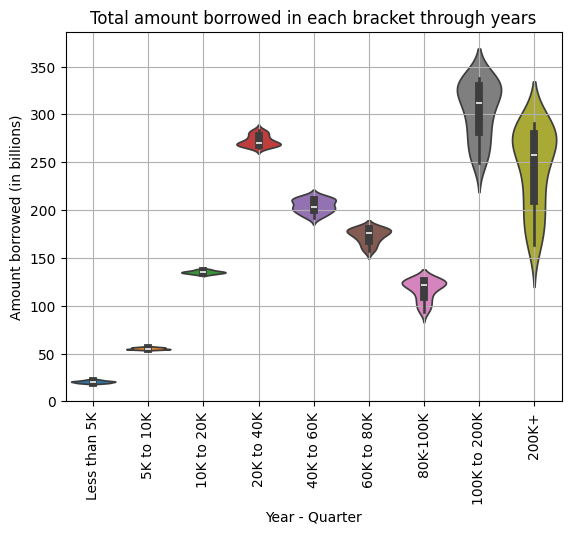

In [21]:
sns.violinplot(amount_lent_df)
plt.title("Total amount borrowed in each bracket through years")
plt.xlabel("Year - Quarter")
plt.ylabel("Amount borrowed (in billions)")
plt.xticks(rotation=90)
plt.grid()
plt.show()